#   Bessel Processes

The purpose of this notebook is to provide an illustration of the [Bessel Processes](https://en.wikipedia.org/wiki/Bessel_process) and some of its main properties. 


## Integer Case 

### Definition

Let  $W =\{  W_t = (W^1_t, \cdots, W^d_t) : t\geq 0  \},$ be a $d$-dimensional Brownian Motion, for some integer $d \geq 2$. The **Bessel process** of dimension $d$ is defined as the Euclidean norm of $W$. That is

\begin{equation}
X_t  =  \|W_t\| = \sqrt{\sum_{i=1}^d (W^i_t)^2}, \qquad t \geq 0.
\end{equation}

### Simulation

We can simulate paths from a Bessel processs $X$ of integer dimension $d$ by simply using the previous definiton. That is, by simulating from a $d$-dimensional Brownian motion and then taking the norm. More precisely, for a give a fixed integer $d\geq 2$, we are going to consider a discrete partition over an interval $[0,T]$ for the simulation to take place. For simplicity, we are going to take an equidistant partition of size $n\in \mathbb{N}$, over the interval $[0,T]$, i.e.:
\begin{equation*}
t_j = \frac{j}{n-1} T \qquad  \hbox{for } j = 0, \cdots, n-1.
\end{equation*}
Then, the goal is to simulate a path of the form $\{ X_{t_j} , j=0,\cdots, n-1\}$.

- Step 1. Simulate a path $\{ W_{t_j}^{i} , j=0,\cdots, n-1\}$ for $i=1, \cdots, d$. That is, we simulate a path from $d$ independent standard Brownian motions. This allows us to construct $d$-dimensional vectors

\begin{equation*}
(W_{t_j}^1, \cdots W_{t_j}^d), \qquad j=1,\cdots\ n.
\end{equation*}

- Step 2.  Take the norm of this vector, that is

\begin{equation*}
X_{t_j} = \sum_{i=1}^d (W_{t_j}^{i})^2, \qquad j=1,\cdots\ n.
\end{equation*}

In [21]:
from aleatory.processes import BrownianMotion
import numpy as np

d = 3
T = 1.0
n = 100

times = np.linspace(0, T, n) # Partition of the interval [0,T]
brownian = BrownianMotion(T) # A Brownian Motion instance

brownian_samples = [brownian.sample_at(times) for _ in range(d)] # Building the vectors (W_{t_j}^1 , ... W_{t_j}^d)
bessel_path = np.array([np.linalg.norm(coord) for coord in zip(*brownian_samples)]) # Taking the Euclidian norm


Now, let's plot our simulated path!

In [22]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid") # These are optional configurations
plt.rcParams["figure.figsize"] = (10, 5)
%config InlineBackend.figure_format ='retina'

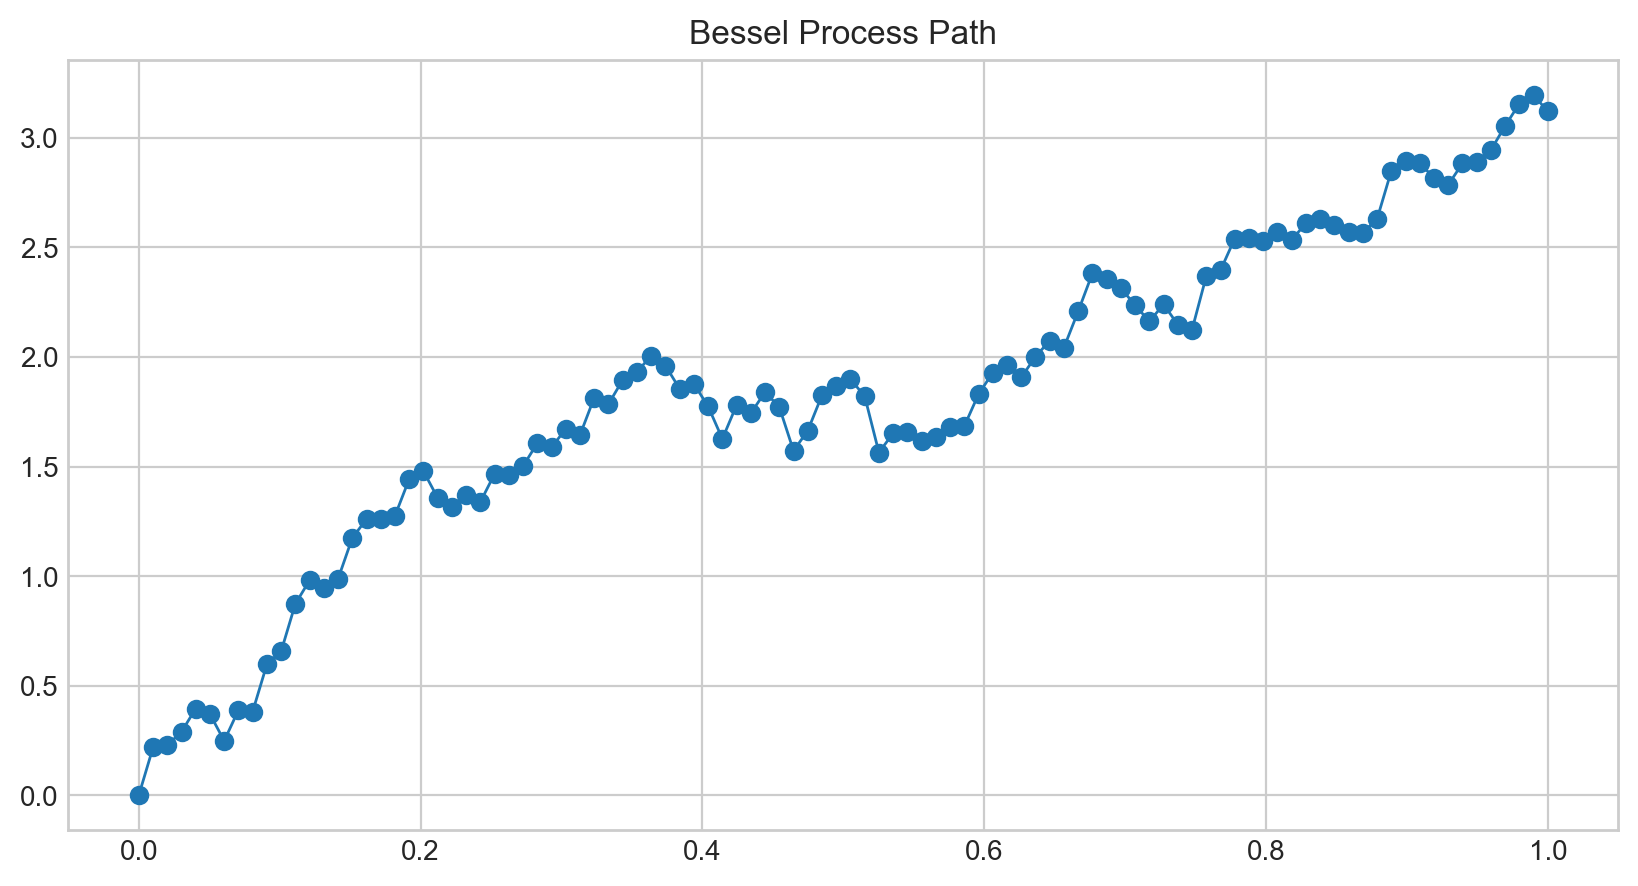

In [23]:
plt.plot(times, bessel_path, 'o-', lw=1)
plt.title('Bessel Process Path')
plt.show()

### Marginal Distributions

Note that for any given $t\geq 0$, we can write 
\begin{equation}
X_t^2 = \sum_{i=1}^d (W^i_t)^2  =  t^2 \sum_{i=1}^d \left( \dfrac{W_t^i}{t} \right)^2,
\end{equation}

and using the fact that each component $W^i_t$ follows a normal distribution $\mathcal{N}(0,t)$ (by definition of $d$-dimensional Brownian Motion) conclude that $X_t^2$ is a scaled Chi-squared random variable.

Similarly,  we can write

\begin{equation}
X_t =  t \sqrt{ \sum_{i=1}^d \left( \dfrac{W_t^i}{t} \right)^2 },
\end{equation}

 we can conclude that $X_t$ is a scaled Chi random-variable.

### Expectation and Variance

### SDE Representation

**Proposition.** Let $d\geq 2$ be an integer and choose $x\geq 0$. Then the Bessel process $X$ with dimension $d$ starting at $x$ satisfies the integral equation

\begin{equation}
X_t = x +  \int_0^t \frac{(d-1)}{2X_s} ds + B_t, \qquad 0\leq t < \infty,
\end{equation}

where $B$ is the standard one-dimensional Brownian motion

\begin{equation}
B = \sum_{i=1}^dB^i,  \quad \text{with} \quad B_t^i = \int_0^t \frac{W_s^i}{X_s}dW_s^i,  \qquad 1 \leq i \leq d.
\end{equation}

*Proof:* First of all, note that $X_t$ can be at the origen only when $W_t^{1}$ is. Hence, $\mathbb{P}(X_t = 0) =0$ for any $t>0$. This implies that the integrand 

$$\frac{d-1}{2X_s}$$ 

in equation (6.4) is well defined almost surely. Next, note that the processes $B^i$ are square integrable since

$$\mathbb{E} \left[ \int_0^t  \left(\frac{1}{X_s} W_s^i \right)^2  ds\right] \leq t.$$

Moreover, 

\begin{equation*}
\langle B^i, B^j \rangle_t = \int_0^t \frac{1}{X_s^2}W_s^iW_s^j d\langle W^i, W^j \rangle_s= \delta_{ij} \int_0^t \frac{1}{X_s^2}W_s^iW_s^j ds,
\end{equation*}
which implies
\begin{equation*}
\langle B\rangle_t =  \sum_{i=1}^d \langle B^i \rangle_t =  t.
\end{equation*}

Thus, the using the  Levy's characterisation theorem we can conclude that the process $B$ is indeed a standard one-dimensional Brownian motion.

To prove that $X$ satisfies the SDE (6.4) one could think of applying Ito's formula to the function $f(x) = \| x\|$, for which

\begin{equation}
\frac{\partial}{\partial x_i} f(x) = \frac{x_i}{\| x \|} , \quad \frac{\partial^2}{\partial x_i \partial x_j} f(x) = \frac{\delta_{ij}}{\| x \|} - \frac{x_i x_j}{\|x \|^3}, \qquad 1 \leq i, j \leq d,
\end{equation}

holds on $\mathbb{R}^d-\{0\}$. The problem here is that $f$ is not differentiable at the origin and therefore we cannot use this argument directly. 

Instead, let us introduce the process $Y=\{Y_t=X_t^2 : t\geq 0\}$, and use Ito's formula to prove that 

\begin{equation}
Y_t = x^2 + 2 \sum_{i=1}^d \int_0^t W_s^i dW_s^i + td.
\end{equation}


Now, the idea is to use approximations of the function  $g(y)=\sqrt{y}$. So, for $\epsilon>0$, let us define the function $g_{\epsilon}:\mathbb{R} \rightarrow \mathbb{R}$, given by

\begin{equation*}
g_{\epsilon}(y)= \begin{cases}
\frac{3}{8} \sqrt{\epsilon} + \frac{3}{4\sqrt{\epsilon}}y - \frac{1}{8\epsilon \sqrt{\epsilon}}y^2; & y < \epsilon,\\
\sqrt{y}; & y\geq \epsilon,
\end{cases}
\end{equation*}

which is twice differentiable and converges towards $g(y)$ as $\epsilon \downarrow 0$, for each $y\geq 0$. So, by Ito's formula we obtain

\begin{equation}
g_{\epsilon} (Y_t) = g_{\epsilon} (x^2) + \sum_{i=1}^d I_{t}^i(\epsilon) + J_t(\epsilon) + K_t(\epsilon),
\end{equation}

where

\begin{align*}
I_{t}^i(\epsilon) &= \int_0^t \left[  1_{\{Y_s\geq \epsilon\}} \frac{1}{X_s} +  1_{\{Y_s < \epsilon\}} \frac{1}{2\sqrt{\epsilon}} \left( 3 - \frac{Y_s}{\epsilon} \right)  \right] W_s^i dW_s^i  \\
J_t(\epsilon)     &= \int_0^t 1_{\{Y_s\geq \epsilon\}} \frac{d - 1}{2X_s} ds  \\
 K_t(\epsilon)    &= \int_0^t 1_{\{Y_s < \epsilon\}} \frac{1}{4 \sqrt{\epsilon}}  \left[ 3d - (d+2)\frac{Y_s}{\epsilon} \right]  ds.
\end{align*}

Next we show that, as $\epsilon\downarrow 0$ equation (6.8) yields (6.4). From the monotone convergence theorem, we seee that 

\begin{equation*}

\lim_{\epsilon\downarrow 0} J_t(\epsilon)  =  \int_0^t 1_{\{Y_s\geq 0\}} \frac{d - 1}{2X_s} ds  =  \int_0^t\frac{d - 1}{2X_s} ds, \quad \text{a.s.}

\end{equation*}


We also have 

\begin{equation*}
0\leq \mathbb{E}[K_t(\epsilon)] \leq \frac{3d}{4\sqrt{\epsilon}} \int_0^t \mathbb{P}( Y_s < \epsilon) ds.
\end{equation*}

The probability in the integrand is bounded above by 

\begin{equation*}
 \mathbb{P}( (W_s^1)^2 +(W_s^2)^2 < \epsilon ) =  \int_0^{2\pi}\int_0^{\sqrt{\epsilon}}  \frac{1}{2\pi s} e^{-\frac{\rho^2}{2s}} \rho d\rho d\theta,
\end{equation*}

and so the integral becomes, upon Fubini's theorem and the change of variable $\xi =\frac{\rho}{\sqrt{s}}$:


\begin{align*}

\int_0^t \mathbb{P}(Y_t < \epsilon ) ds   &\leq \int_0^{\sqrt{\epsilon}}  \rho \left( \int_0^t \frac{1}{s} e^{-\frac{\rho^2}{2s}} ds \right ) d\rho \\ 
&= 2  \int_0^{\sqrt{\epsilon}}  \rho  \left( \int_{\frac{\rho}{\sqrt{t}} }^{\infty} \frac{1}{\xi} e^{-\frac{\xi^2}{2}} d\xi \right ) d\rho.
\end{align*}

But now it is not difficult to see that this expression is $o(\sqrt{\epsilon})$ as $\epsilon\downarrow 0$, using the rule of l'Hopital. Therefore

\begin{equation*}
\lim_{\epsilon\downarrow 0} \mathbb{E}[ K_t(\epsilon) ] = 0. 
\end{equation*}


Finally, 

\begin{align*}
\mathbb{E}[ (B_t^i - I_t^i(\epsilon))^2 ] &= \mathbb{E} \int_0^t   1_{\{Y_s < \epsilon\}} \left[\frac{1}{X_s} - \frac{1}{2\sqrt{\epsilon}} \left( 3 - \frac{Y_s}{\epsilon} \right)  \right]^2 (W_s^i)^2ds \\
& = \mathbb{E} \int_0^t   1_{Y_s < \epsilon} \left[1 - \frac{1}{2}\sqrt{\frac{Y_s}{\epsilon}} \left( 3 - \frac{Y_s}{\epsilon}  \right)  \right]^2 \left( \frac{W_s^i}{X_s} \right)^2ds \\
& \leq \int_0^t \mathbb{P}(Y_s < \epsilon) ds = o(\sqrt{ \epsilon }) \qquad \text{as} \ \ \epsilon\downarrow 0.
\end{align*}


Note: In the case $d=1$, an integral equation similar to (6.4) can be derived from Tanaka's formula.

## General Definition

For every $\delta\geq 0$ and $y\geq 0$,  a squared Bessel process with dimension $\delta$, starting at $y$ is defined as the unique strong solution of the SDE

\begin{align}
dY_t &= \delta dt + 2 \sqrt{ |Y_t| } dB_t,  \qquad t\geq 0 \\
Y_0 & = y,
\end{align}

and is denoted by $BESQ^{\delta}_y$. 

Moreover, the process $X = \{ X_t = \sqrt{Y_t}, t\geq 0 \}$, is called a Bessel process of dimension $\delta$, starting at $x = \sqrt{y}$,  and is denoted by $BES^{\delta}_x$. 

Bessel processes are commonly parameterised as $BES^{(\nu)}$ where $\nu$ is imply  

$$\nu  = \frac{\delta}{2} -1.$$

Hereafter, we are going to use this parameterisation.

### Existence and Uniqueness

In order to demonstrate that equation (6.11) has a solution we need to introduce the following two results which can be found in [Jeanblanc, Yor, Chesney, 2009].


**Theorem 1.** Consider the SDE
\begin{equation}
X_t =X_0 + \int_0^t b(s,X_s) ds + \int_0^t\sigma(s,X_s)dW_s.
\end{equation}
Suppose $\varphi : (0,\infty) \rightarrow (0,\infty)$ is a Borel function such that 

$$ \int_0^{\infty} \dfrac{da}{\varphi(a)}  = \infty.$$

If any of the following conditions holds, then the equation admits a unique solution which is is strong. Moreover the solution $X$ is a Markov process.

1. the function $b$ is bounded, the function $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq \varphi(|x-y|), $$

and $|\sigma|\geq \epsilon >0$.

2. $b$ is Lipschitz continuous, and 

$$ |\sigma(s,x) - \sigma(s, y)|^2 \leq \varphi(|x-y|). $$


3. $b$ is bounded, and $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq |f(x) - f(y)|, $$

where $f$ is a bounded increasing function, $|\sigma|\geq \epsilon >0$.


**Theorem 2. (Comparison Theorem)** Consider the two SDEs

\begin{equation}
dX^i_t = b_i(t, X^i_t) dt + \sigma(t,X^i_t) dW_t, \qquad i =1,2;
\end{equation}
where the functions $b_i$ are both bounded and at least one of them is Lipschitz; and $\sigma$ satisfies condition (2) or (3) in Theorem 1.  Suppose also that $X^1_0 \geq X^2_0,$ and $b_1(x) \geq b_2(x)$. Then $X^1_t \geq X^2_t$ for all $t$, almost surely.



Now, in order to show that (1) has a unique solution we introduce the SDE

\begin{align}
dY_t &= \delta dt + 2 \sqrt{ |Y_t| } dB_t,  \qquad Y_t\geq 0 \\
Y_0 & = y.
\end{align}

Then, using the elementary inequality 

$$|\sqrt{x} - \sqrt{y}| \leq \sqrt{|x-y|},  \qquad x, y \geq 0,$$

Theorem 1 implies that for every $\delta \geq 0$ the equation () has a unique strong solution. Such solution is called the squared Bessel process of dimension $\delta$ and is denoted by $BESQ^{\delta}$.

### Why we can drop the absolute value inside the square root 

First, we should note that if the process starts at zero, i.e. $y=0$, and $\delta=0$, then the $Y=0$ is the unique solution.

Moreover, consider $0\leq \delta \leq \delta'$ and let $Y$ and $Y'$ the corresponding squared Besses processes $BESQ^{\delta}$ and $BESQ^{\delta'}$ both starting at the same initial condition. Then the Comparison Theorem imples that 

$$ 0\leq Y_t \leq Y_t', \qquad \hbox{almost surely.}$$

Thus, $Y$ satistifies $Y_t\geq 0$ for all $t\geq 0$, and the absolute value inside the square root term is not needed. So, hereafter we will ommit it.

## Expectation and Variance

For each $t>0$, the conditional marginal $Y_t|Y_0$ from a squared Bessel process satisfies

\begin{equation*}
\mathbf{E}[Y_t] = \mathbb{E}[Y_t|Y_0=y]= y + \delta t,
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [Y_t ] = \mathbb{Var} [Y_t |Y_0] = 2t(2y + \delta t)
\end{equation*}

### Python Implementation

For given $y, \delta>0$, and $t>0$ we can implement the above formulas for the expectation, and variance, as follows. 

In [2]:
import numpy as np

y0 = 2.5
delta = 3.0
t = 1.0

exp = y0 + delta*t
var = 2.0*t*(2*y0 + delta*t)

print(f'For y_0={y0}' , f'delta={delta}', f't={t}', sep=", ")
print(f'E[Y_t] = {exp: .4f}')
print(f'Var[Y_t] = {var :.4f}')

For y_0=2.5, delta=3.0, t=1.0
E[Y_t] =  5.5000
Var[Y_t] = 16.0000


In [3]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid") # These are optional configurations
plt.rcParams["figure.figsize"] = (12, 6)
%config InlineBackend.figure_format ='retina'

In [4]:
plt.style.use("seaborn-v0_8-whitegrid") # These are optional configurations
plt.rcParams["figure.figsize"] = (12, 6)
%config InlineBackend.figure_format ='retina'

In [5]:
from math import sqrt

In [6]:
def g_epsilon(y, epsilon):

    if y<= epsilon:
        sqrtep = sqrt(epsilon)
        result = (3/8)*sqrtep +(3/4)*(1/sqrtep)*y - (1/8)*(1.0/(epsilon*sqrtep))*y**2
        return result
    else:
        return sqrt(y)

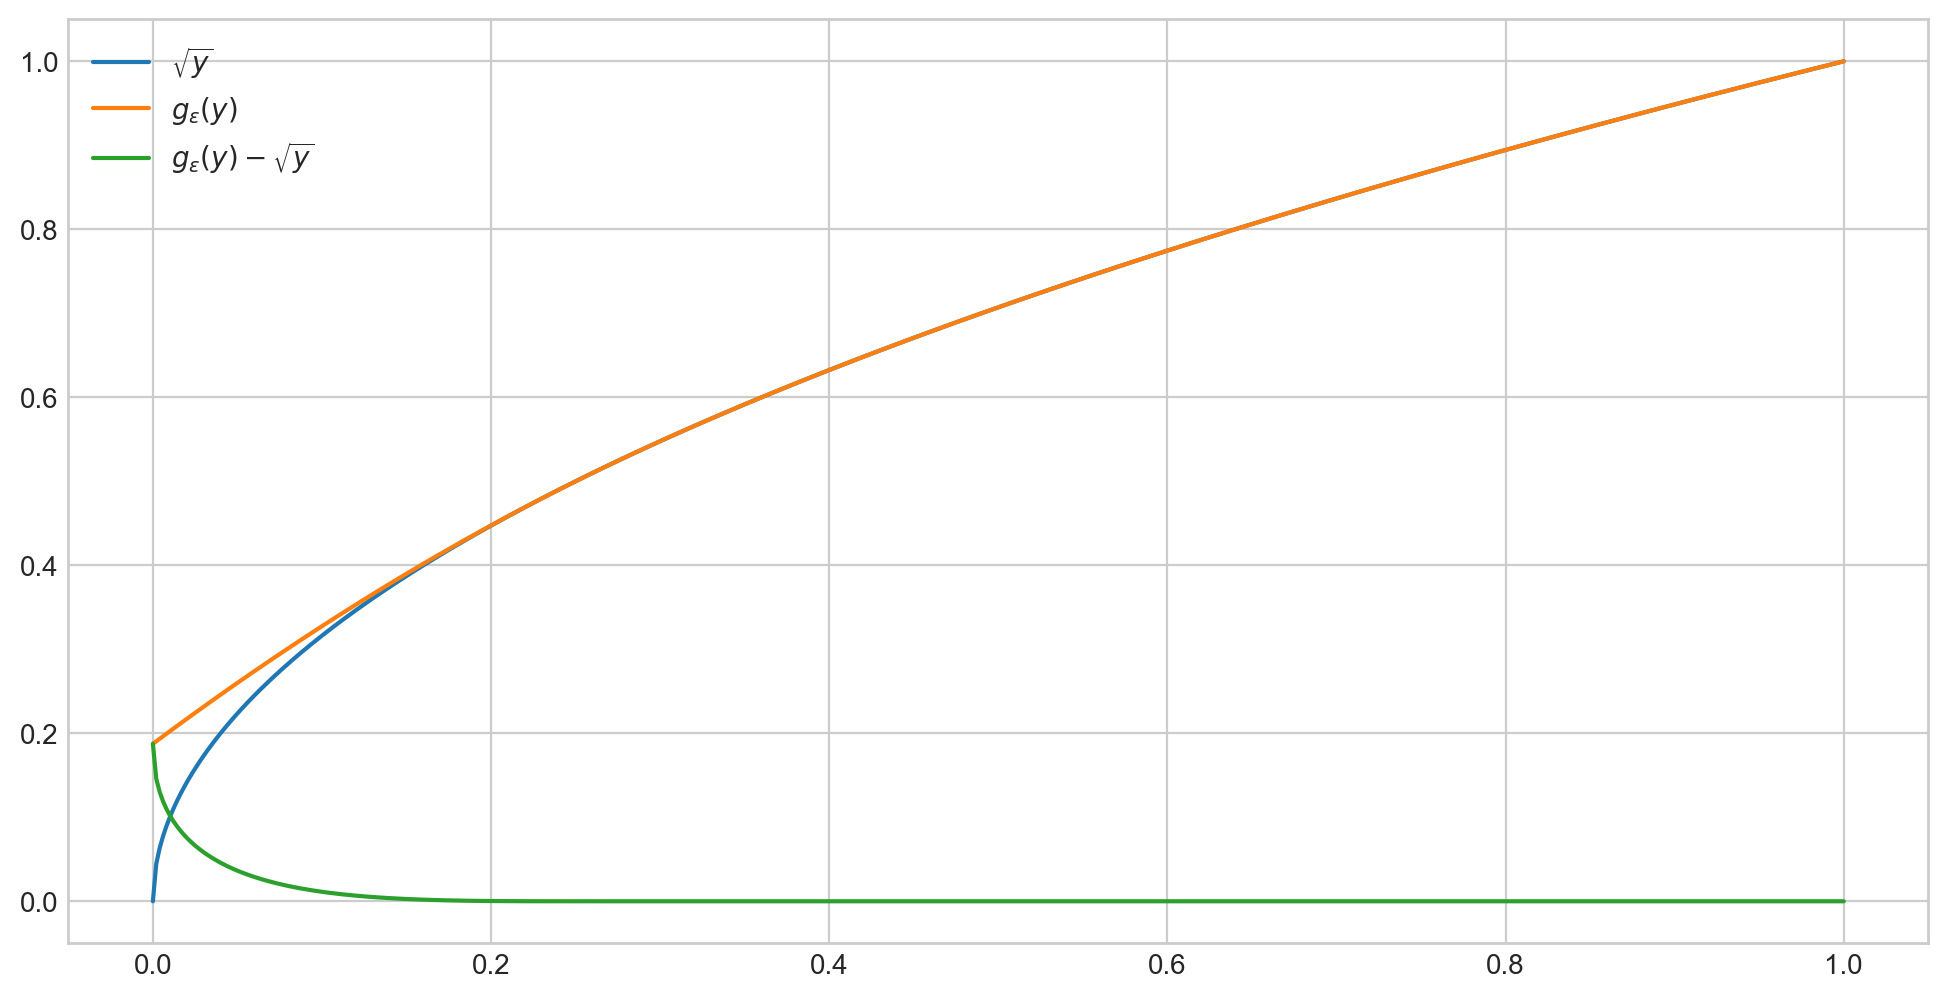

In [7]:
ys = np.linspace(0,1.0,500)
epsilon = 0.25
ges = [ g_epsilon(y, epsilon) for y in ys]
gs = [sqrt(y) for y in ys]
diffs = [a-b for (a, b) in zip(ges, gs)]


plt.plot(ys, gs, label='$\sqrt{y}$')
plt.plot(ys, ges, label = '$g_{\epsilon}(y)$')
plt.plot(ys, diffs, label = '$g_{\epsilon}(y)- \sqrt{y}$')
plt.legend()
plt.show()

In [6]:
# from aleatory.processes import BESProcess, BESQProcess
# bes = BESProcess(dim=10)
# bes.draw(n=100, N=100);

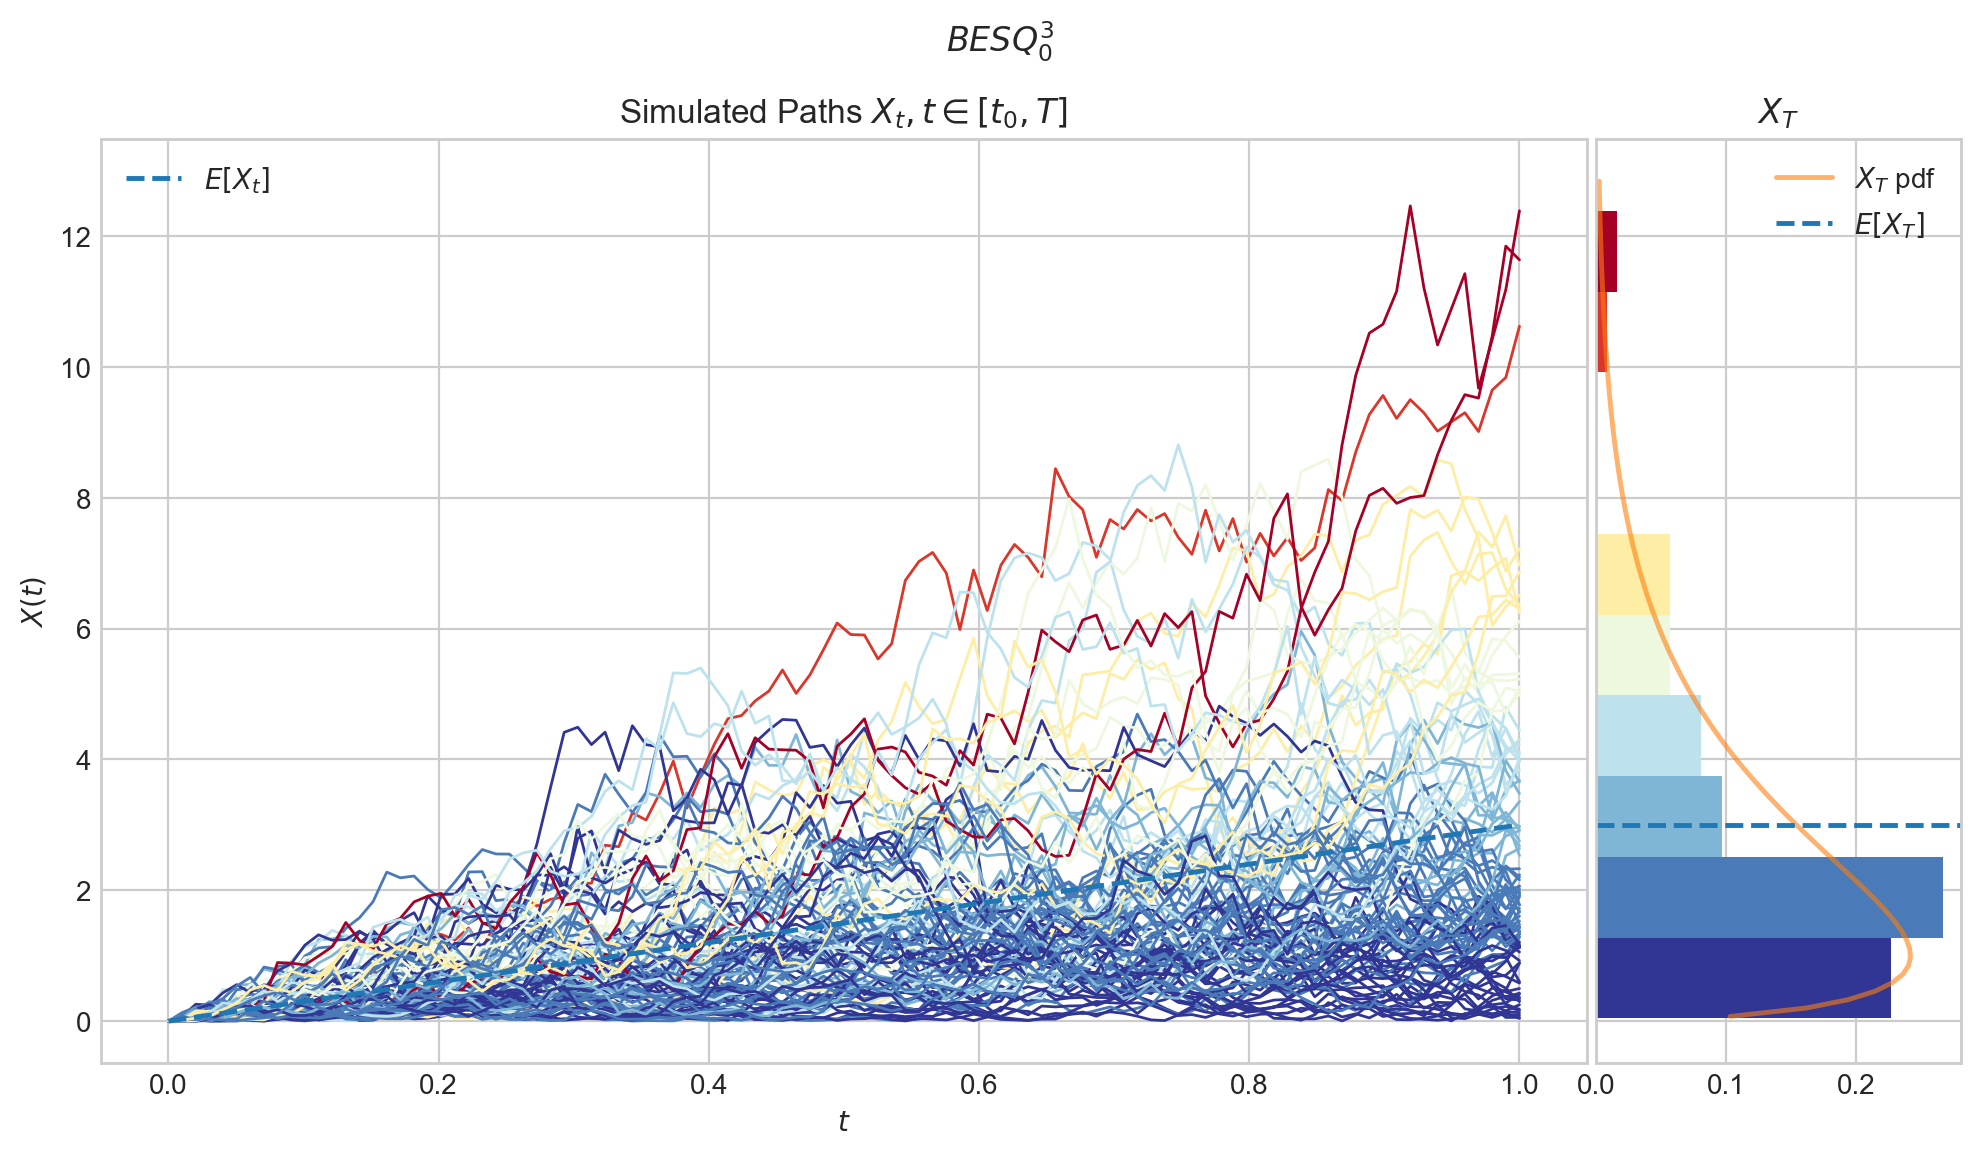

In [8]:
# besq = BESQProcess(dim=3)
# besq.draw(n=100, N=100);